# Machine Learning - Assignment 2

### Katarina Keishanti Joanne Kartakusuma
21/472847/PA/20347

Dataset source: </br>
http://archive.ics.uci.edu/ml/machine-learning-databases/car/

Step 1: Convert .data file to .txt </br>
Step 2: Read car.c45-names and car.names to get more understanding of the data </br>
Step 3: Determine labels and convert .txt to .csv via excel </br>

2) Implement classification task using Decision Tree Classifier from sklearn library. Use GridSearchCV to get the best hyperparameters.

## Import standard library and data cleaning

In [64]:
# Standar Lib

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [6]:
df = pd.read_csv("/Users/katarinajoanne/University/UGM/2 - Second Year/Fourth Semester/Machine Learning/assignment2/car.csv")

In [7]:
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Check if any null value is present

In [8]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Renaming the columns

In [10]:
list(df.columns.values)

df = df.rename(columns={"buying": "buying", 
                   " maint": "maint", 
                   " doors": "doors", 
                   " persons": "persons", 
                   " lug_boot": "lug_boot", 
                   " safety": "safety", 
                   "class": "classes"})

In [11]:
df["classes"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: classes, dtype: int64

In [12]:
list(df.columns.values)

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'classes']

In [13]:
df.classes.unique().size

4

In [14]:
df["buying"] = df["buying"].replace(["low", "med", "high", "vhigh"],
                                    ["1", "2", "3", "4"])
    
df["maint"] = df["maint"].replace(["low", "med", "high", "vhigh"],
                                    ["1", "2", "3", "4"])

df["doors"] = df["doors"].replace(["2", "3", "4", "5more"],
                                    ["1", "2", "3", "4"])

df["persons"] = df["persons"].replace(["2", "4", "more"],
                                    ["1", "2", "3"])

df["lug_boot"] = df["lug_boot"].replace(["small", "med", "big"],
                                    ["1", "2", "3"])

df["safety"] = df["safety"].replace(["low", "med", "high"],
                                    ["1", "2", "3"])

In [15]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,4,4,1,1,1,1,unacc
1,4,4,1,1,1,2,unacc
2,4,4,1,1,1,3,unacc
3,4,4,1,1,2,1,unacc
4,4,4,1,1,2,2,unacc


### Prep Dataset

In [16]:
X = df.drop(['classes'], axis = 1)
y = df['classes']

In [17]:
input_features = df.columns[:-1]
target_feature = df.columns[-1]

input_features, target_feature

(Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object'),
 'classes')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
print("Training input size:", X_train.shape)
print("Training output size:", y_train.shape)
print("Testing input size:", X_test.shape)
print("Testing output size:", y_test.shape)

Training input size: (1382, 6)
Training output size: (1382,)
Testing input size: (346, 6)
Testing output size: (346,)


In [22]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,4,4,4,3,3,3
901,2,4,2,2,1,2
1709,1,1,4,1,3,3
706,3,2,3,1,2,2
678,3,2,2,1,2,1


 ### Training

In [23]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

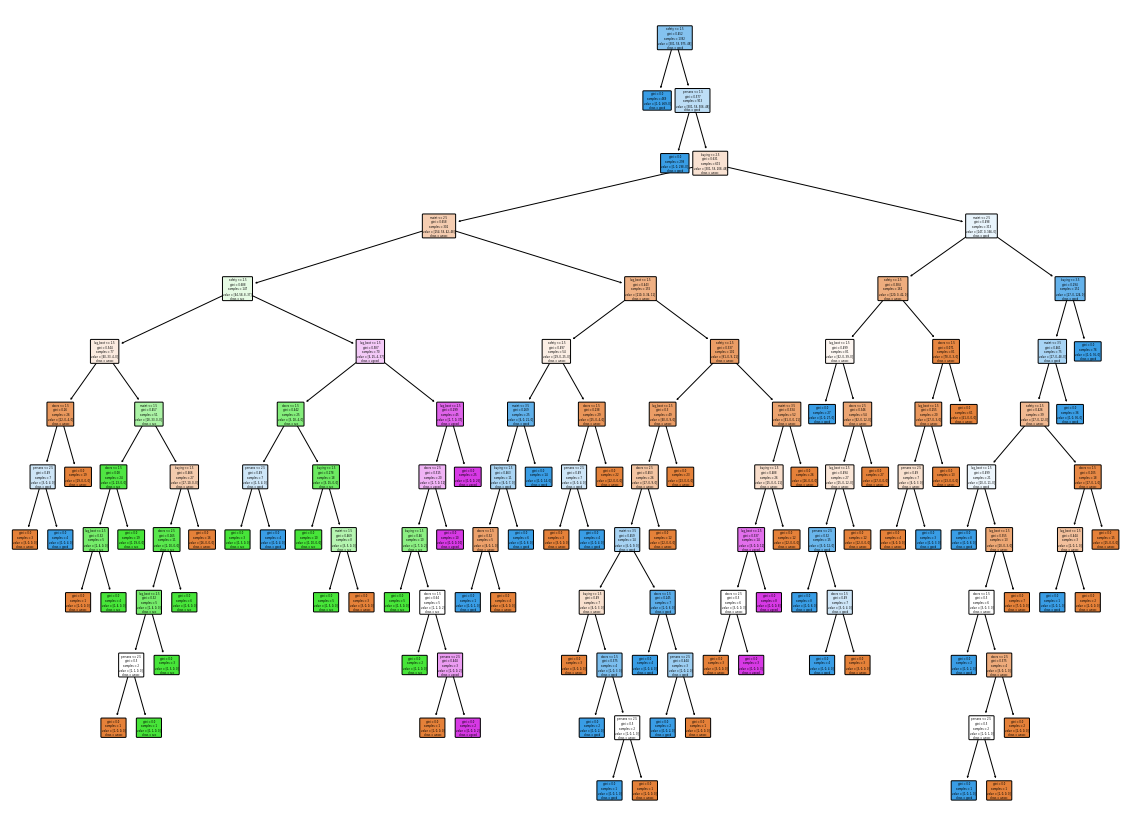

In [31]:
plt.figure(figsize = (20, 15))
plot_tree(dt_clf,
          filled = True,
          rounded = True,
          class_names = ["unacc", "acc", "good", "vgood"],
        feature_names = X_train.columns);

### Testing and accuracy

In [32]:
# Testing the model
testing = dt_clf.predict(X_test)

In [33]:
# Calculate accuracy
(prediction == y_test).mean()

0.9653179190751445

### Hyperparameter Tuning

In [34]:
parameter_grid = {
                "criterion":["gini", "entropy"],
                "max_depth":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
                 }

In [35]:
from sklearn.model_selection import GridSearchCV

In [37]:
dt_optimized = GridSearchCV(dt_clf, parameter_grid, scoring = "accuracy", cv=10, verbose=1) 

In [38]:
dt_optimized.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy', verbose=1)

In [40]:
dt_prediction = dt_optimized.predict(X_test)

In [41]:
dt_optimized.best_params_

{'criterion': 'gini', 'max_depth': 12}

In [42]:
print('CV Accuracy: %0.3f' % dt_optimized.best_score_)

CV Accuracy: 0.983


### Decision tree with Gini

In [46]:
gini_model = DecisionTreeClassifier(criterion = "gini", max_depth = 12, random_state = 0)
gini_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=0)

In [47]:
y_pred = gini_model.predict(X_test)

In [48]:
print("Training Accuracy: ", gini_model.score(X_train, y_train)*100, "%")
print("Testing Accuracy: ", gini_model.score(X_test, y_test)*100, "%")

Training Accuracy:  100.0 %
Testing Accuracy:  96.24277456647398 %


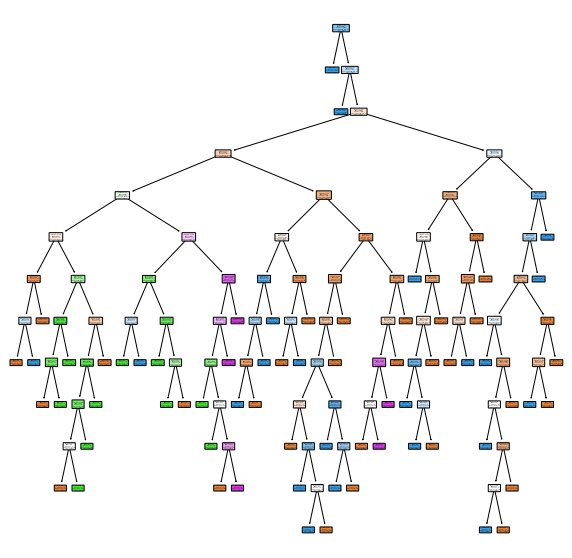

In [53]:
plt.figure(figsize = (10, 10))
plot_tree(gini_model, max_depth = 12, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True);

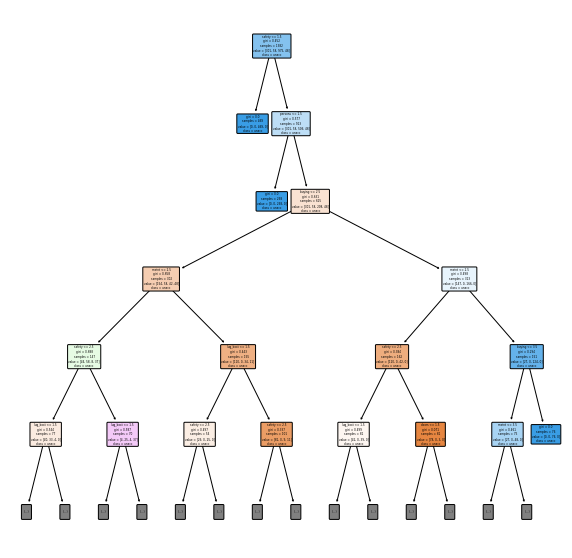

In [55]:
plt.figure(figsize = (10, 10))
plot_tree(gini_model, max_depth = 5, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True);

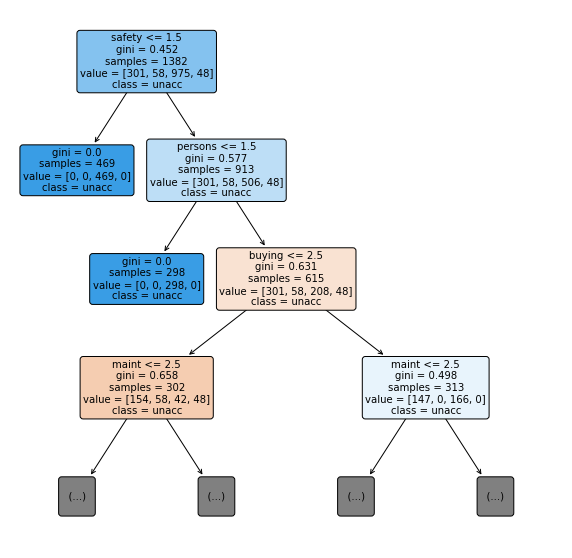

In [56]:
plt.figure(figsize = (10, 10))
plot_tree(gini_model, max_depth = 3, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True);

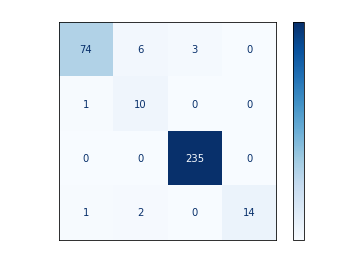

In [70]:
color = 'white'
matrix = plot_confusion_matrix(gini_model, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [72]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.97      0.89      0.93        83
        good       0.56      0.91      0.69        11
       unacc       0.99      1.00      0.99       235
       vgood       1.00      0.82      0.90        17

    accuracy                           0.96       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.97      0.96      0.96       346

